In [1]:
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns

In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/chris/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [46]:
file = "../code/data/combined.times"
df = pd.read_csv(file)

def computeSlowdown(grp):
    grp['slowdown'] = grp['time'] / grp['time'].min()
    return grp
df = df.groupby(['inst','iter','type']).apply(computeSlowdown)
df['time'] = df['time'] / 1000
print(df)

                 inst  type  iter           alg      time   slowdown
0     fb-pages-tvshow   low     0     DinicsOPT     0.045   1.000000
1     fb-pages-tvshow   low     0        Dinics     1.133  25.177778
2     fb-pages-tvshow   low     0   PushRelabel     1.987  44.155556
3     fb-pages-tvshow   low     0  BK-Algorithm     0.808  17.955556
4     fb-pages-tvshow  high     0     DinicsOPT     0.212   1.000000
...               ...   ...   ...           ...       ...        ...
1195            brain  high     9  BK-Algorithm  2168.697  36.686690
1196            brain    gh     9     DinicsOPT    18.753   1.000000
1197            brain    gh     9        Dinics   183.843   9.803391
1198            brain    gh     9   PushRelabel   255.856  13.643470
1199            brain    gh     9  BK-Algorithm  1412.304  75.310830

[1200 rows x 6 columns]


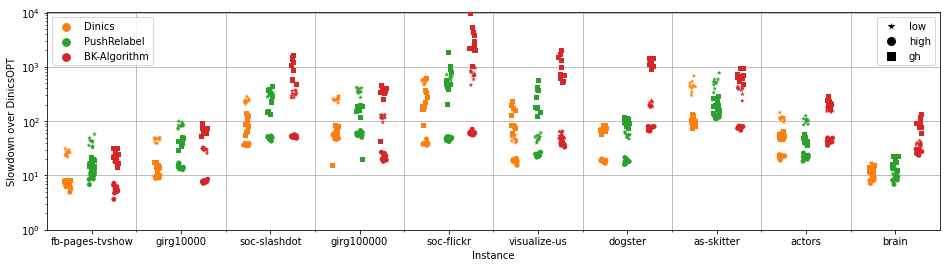

In [48]:
shape = {
    'low': '*',
    'high': 'o',
    'gh': 's'
}

colors = {'DinisOPT': 'C0','Dinics': 'C1','PushRelabel': 'C2','BK-Algorithm': 'C3'}

fig, ax = plt.subplots(figsize=(16,4))

first = True
for t, type_data in df[df.alg!='DinicsOPT'].groupby('type'):
    ax = sns.stripplot(x='inst', y='slowdown', data=type_data, hue='alg', marker=shape[t], dodge=True, palette=colors)
    if first:
        leg1 = ax.legend(loc='upper left')
        ax.add_artist(leg1)
        first = False

ax.legend(loc='upper right', handles=[matplotlib.lines.Line2D([0], [0],marker=shape[t], color='w', label=t, markerfacecolor='k', markersize=10) for t in shape.keys()])

ax.set_ylabel('Slowdown over DinicsOPT')
ax.set_xlabel('Instance')
ax.set_ylim(1.0, ax.get_ylim()[1])
ax.semilogy()

# grid and size
num_inst = df.inst.nunique()
ax.set_xticks([x+0.5 for x in range(0,num_inst-1)], minor=True)
ax.set_xlim(-0.5, num_inst-0.5)
ax.grid(which='minor', axis='x')
ax.grid(which='major', axis='y')

plt.savefig('eval_runtime.pdf', bbox_inches='tight')
plt.show()

In [5]:
# http://www.cookbook-r.com/Graphs/Colors_(ggplot2)/#a-colorblind-friendly-palette

In [41]:
df_other = pd.read_csv("../code/data/other/combined.times")

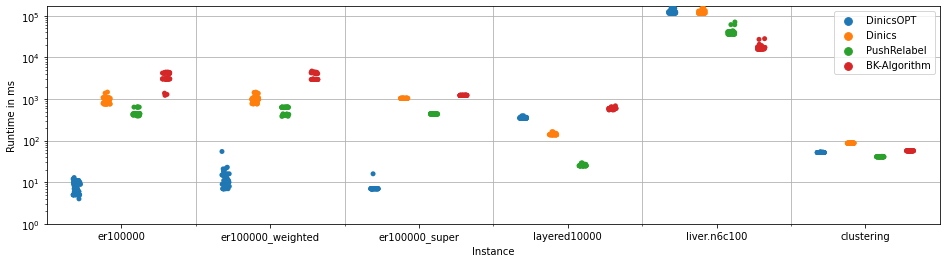

In [45]:
fig, ax = plt.subplots(figsize=(16,4))
ax = sns.stripplot(x='inst', y='time', data=df_other, hue='alg', dodge=True)
ax.legend()

ax.set_ylabel('Runtime in ms')
ax.set_xlabel('Instance')
ax.set_ylim(1.0, ax.get_ylim()[1])
ax.semilogy()
num_inst = len(ax.get_xticks())
ax.set_xticks([x+0.5 for x in range(0,num_inst-1)], minor=True)
ax.set_xlim(-0.5, num_inst-0.5)
ax.grid(which='minor', axis='x')
ax.grid(which='major', axis='y')
plt.savefig('eval2_runtime.pdf', bbox_inches='tight')
plt.show()